In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [6]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

170500096/170498071 [==============================] - 4s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [7]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [8]:
# Build the model using the functional API
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 48s 30ms/step - loss: 1.5893 - accuracy: 0.4213 - val_loss: 1.3320 - val_accuracy: 0.5170
Epoch 2/15
1563/1563 [==============================] - 48s 31ms/step - loss: 1.3208 - accuracy: 0.5241 - val_loss: 1.1748 - val_accuracy: 0.5794
Epoch 3/15
1563/1563 [==============================] - 48s 31ms/step - loss: 1.2002 - accuracy: 0.5689 - val_loss: 1.1123 - val_accuracy: 0.6011
Epoch 4/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.1057 - accuracy: 0.6041 - val_loss: 1.0276 - val_accuracy: 0.6305
Epoch 5/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.0359 - accuracy: 0.6318 - val_loss: 1.0209 - val_accuracy: 0.6341
Epoch 6/15
1563/1563 [==============================] - 48s 30ms/step - loss: 0.9765 - accuracy: 0.6516 - val_loss: 0.9647 - val_accuracy: 0.6667
Epoch 7/15
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9178 - accuracy: 0.6725 - val_loss: 0.9470 -

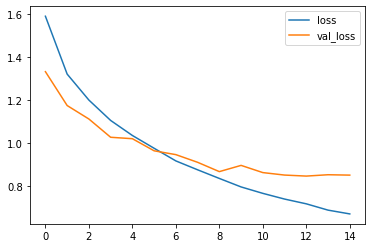

In [10]:
#Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

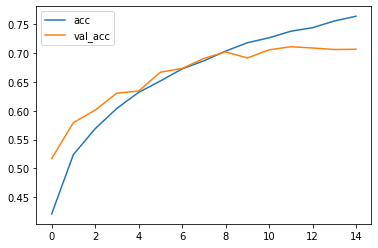

In [11]:
#Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion Matrix, without Normalization
[[755  35  37  13  21   4  13   9  66  47]
 [ 11 827   5   9   1   4   4   3  22 114]
 [ 77  10 541  68 122  60  75  22  11  14]
 [ 19  11  60 498  62 191  88  43   5  23]
 [ 18   3  55  77 693  36  51  56   6   5]
 [ 11   7  43 174  63 605  40  39   4  14]
 [ 10  11  35  63  35  24 811   4   5   2]
 [ 14   9  27  43  79  62  13 733   4  16]
 [ 55  44  15  16  17   9   9   3 801  31]
 [ 29  88   6  23   3   7   7  11  25 801]]


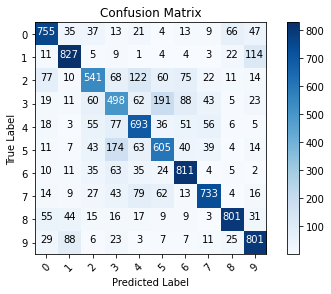

In [12]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize= False, title='Confusion Matrix', cmap=plt.cm.Blues):

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix, without Normalization")
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [13]:
labels = ''' airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

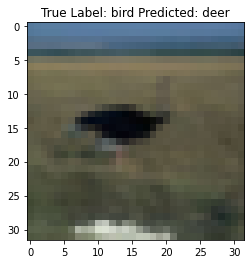

In [15]:
#Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True Label: %s Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]));